In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load the data

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Number of instances: " + str(train.shape[0]))
print("Number of features: " + str(train.shape[1]))

Number of instances: 1460
Number of features: 81


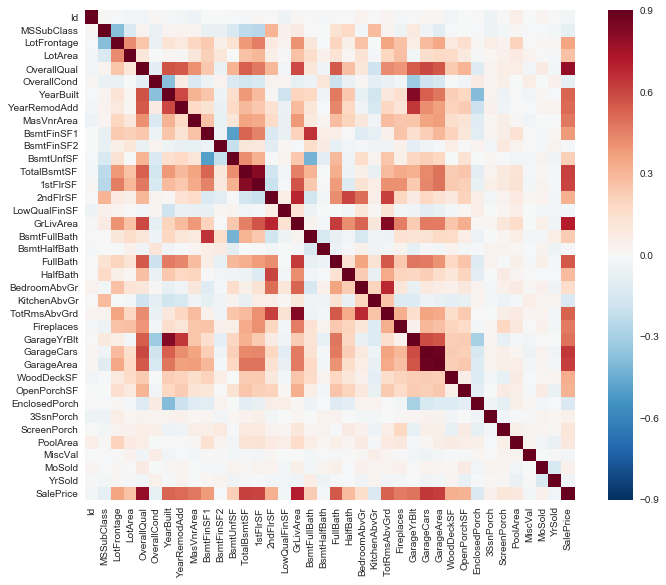

In [20]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

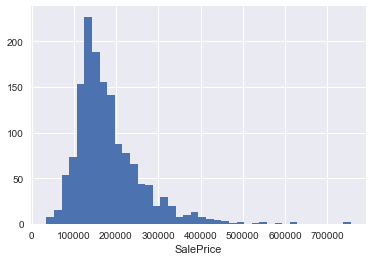

In [6]:
# Looking at the distribution of the target variable

fig, ax = plt.subplots()
ax.hist(train['SalePrice'], 40)
ax.set_xlabel("SalePrice")
plt.show()

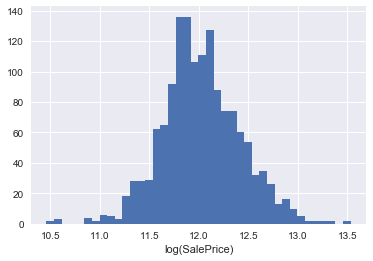

In [7]:
#The variable is positively skewed. We need to decrease skewdness,
#to be able to run statistical tests on the data.
#In order to correct the positive skewdness we will use the logarithm

fig, ax = plt.subplots()
ax.hist(np.log(train["SalePrice"]), 40)
ax.set_xlabel('log(SalePrice)')
plt.show()

In [8]:
#Turning categorical data into dummy variables
train_0 = train.copy()
train_0 = pd.get_dummies(train_0)

In [9]:
#Selecting oly the numerical data
num_cols = train_0.select_dtypes(include=["number"]).columns
train_0 = train_0[num_cols]


In [10]:
#Filling the NAs
train_0 = train_0.fillna(train_0.mean())

In [11]:
#Modifying the test data
test_0 = test.copy()
test_0 = pd.get_dummies(test_0)
test_0 = test_0.fillna(test_0.mean())

In [12]:
#Some variables exist in train but not in test
for col in num_cols:
    if col not in test_0:
        test_0[col] = 0
        
test_0 = test_0[num_cols]

In [14]:
#MODELING

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [15]:
random_forest = RandomForestRegressor(max_depth=30, n_estimators=500, max_features=100,
                                     oob_score=True, random_state=123)
cv_score = cross_val_score(random_forest, train_0.drop('SalePrice',axis=1),
                          train_0['SalePrice'], cv=5, n_jobs = -1)


In [16]:
print('CV Score = ' + str(np.mean(cv_score)))

CV Score = 0.86938320532


In [21]:
# after submiting, the score was 0.14523, but it can be improved.
# Tring different models

from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
cv_score = cross_val_score(xgb, train_0.drop(['SalePrice','Id'], axis = 1), train_0['SalePrice'], cv = 5, n_jobs = -1)

In [22]:
print('CV Score = '+ str(np.mean(cv_score)))

CV Score = 0.889781817055


In [23]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
LCV = LassoCV()
scale_LCV = Pipeline([('scaler',scaler),('LCV',LCV)])

cv_score = cross_val_score(scale_LCV, train_0.drop(['SalePrice','Id'], axis = 1), train_0['SalePrice'], cv = 5, n_jobs=-1)

print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.836281498245
